In [83]:
using QuantumCumulants
using SymbolicUtils
using IterTools
using Symbolics
#using SymPy

In [85]:
include("../src/diagrams.jl")
include("../src/bvector.jl")
include("../src/bubble.jl")
include("../src/diagram.jl")
include("../src/poles.jl")
include("../src/contractions.jl")
include("../src/printing.jl")
include("../src/corrections.jl")
include("../src/lindblad.jl")

effective_lindblad (generic function with 1 method)

## Setting up the Hilbert space and operators

In [192]:
#Setup
h_cav = FockSpace(:cavity)
h_atom = NLevelSpace(:atom, (:g,:e))
h = tensor(h_cav, h_atom)

@qnumbers a::Destroy(h) σ::Transition(h)

#@syms ω_0 ω_d g κ γ ϵ ω_3 ω_1
#@variables ω_c::real ω_a::real
#@variables t::Real

σz = 2* σ(:e, :e)  - 1
σx = σ(:g, :e) + σ(:e, :g)
σy = 1im* (σ(:e, :g) - σ(:g, :e))


(0 + 1im*(σeg)+0 - 1im*(σge))

## Studying the Rabi model

### First order approximation

In [193]:
@variables ω_c ω_a

ωs_rabi = [ω_c + ω_a, -ω_c - ω_a, -ω_c + ω_a, ω_c - ω_a]
hs_rabi = [a*σ(:e, :g),a'*σ(:g, :e),a*σ(:g, :e), a'*σ(:e, :g)]
#typeof(ω_c)

eff_ham_rabi_1, ops_eff_rabi_1, ωs_eff_rabi_1, gs_eff_rabi_1 = effective_hamiltonian(hs_rabi, ωs_rabi, 1)

(Any[], Any[(a*σeg), (a′*σge), (a*σge), (a′*σeg)], Any[Any[ω_a + ω_c], Any[-ω_a - ω_c], Any[ω_a - ω_c], Any[ω_c - ω_a]], Any[exp(-0.5(τ^2)*((ω_a + ω_c)^2)), exp(-0.5(τ^2)*((-ω_a - ω_c)^2)), exp(-0.5(τ^2)*((ω_a - ω_c)^2)), exp(-0.5(τ^2)*((ω_c - ω_a)^2))])

In [226]:
#@syms t::Real
@cnumbers ω1 ω2
@syms τ1

eff_ham = []
@syms t
    for i in 1:length(gs_eff_rabi_1)
        ωs = substitute(sum(ωs_eff_rabi_1[i]),Dict([ω_a=>ω1,ω_c=>ω2]))
        println(ωs*t)
        println(exp(-1im*t*ωs))
        gs = substitute(to_symbol(gs_eff_rabi_1[i]),Dict([ω_a=>ω1,ω_c=>ω2,τ => τ1]))
        push!(eff_ham, gs*exp(-1im*ωs*t)*ops_eff_rabi_1[i])
    end
#eff_ham_rabi_1[1]
#exp(-1im*sum(ωs_eff_rabi_1[1])*t)*eff_ham_rabi_1[1]
#ex = substitute(ωs_eff_rabi_1[1][1],Dict([ω_a=>ω1,ω_c=>ω2]))
#print(ex)
eff_ham
#print(eff_ham_4+eff_ham_2)

t*(ω1 + ω2)
exp((0 - 1im)*t*(ω1 + ω2))
t*(-ω1 - ω2)
exp((0 - 1im)*t*(-ω1 - ω2))
t*(ω1 - ω2)
exp((0 - 1im)*t*(ω1 - ω2))
t*(ω2 - ω1)
exp((0 - 1im)*t*(ω2 - ω1))


4-element Vector{Any}:
 exp((im*(-ω1 - ω2))*t)*exp(-0.5(τ^2)*((ω1 + ω2)^2))*(a*σeg)
 exp((im*(ω1 + ω2))*t)*exp(-0.5(τ^2)*((-ω1 - ω2)^2))*(a′*σge)
 exp((im*(ω2 - ω1))*t)*exp(-0.5(τ^2)*((ω1 - ω2)^2))*(a*σge)
 exp((im*(ω1 - ω2))*t)*exp(-0.5(τ^2)*((ω2 - ω1)^2))*(a′*σeg)

In [237]:
#@variables 
#H_eff = exp((0 - 1im)*T*(ω_a + ω_c))*exp(-0.5(τ^2)*((ω_a + ω_c)^2))*(a*σ(:e,:g))
#@syms t
@cnumbers τ
@syms t
@cnumbers ω1 ω2
eff_ham_1 = exp((im*(-ω1 - ω2))*t)*exp(-0.5(τ^2)*((ω1 + ω2)^2))*(a*σ(:e,:g))
eff_ham_2 = exp((im*(ω1 + ω2))*t)*exp(-0.5(τ^2)*((-ω1 - ω2)^2))*(a'*σ(:g,:e))
eff_ham_3 = exp((im*(ω2 - ω1))*t)*exp(-0.5(1^2)*((ω1 - ω2)^2))*(a*σ(:g,:e))
eff_ham_4 = exp((im*(ω1 - ω2))*t)*exp(-0.5(τ^2)*((ω2 - ω1)^2))*(a'*σ(:e,:g))
#eff_ham = sum(eff_ham_rabi_1)
eff_ham_try = [eff_ham_1,eff_ham_2,eff_ham_3,eff_ham_4]
#H_eff
#@cnumbers t0
#eff_ham_meanfield = substitute(eff_ham,Dict([t=>t0]))
#print(eff_ham_2)
eqs0 = meanfield([a,σ(:e, :g),σ(:g, :e)],eff_ham[4]+eff_ham[3],[];rates=[],order=1,iv=t)


∂ₜ(⟨a⟩) = (0 - 1im)*⟨σeg⟩*exp((im*(ω1 - ω2))*t - 0.5(τ^2)*((ω2 - ω1)^2))
∂ₜ(⟨σeg⟩) = (0 + 1im)*⟨a⟩*exp((im*(ω2 - ω1))*t - 0.5(τ^2)*((ω1 - ω2)^2)) + (0 - 2im)*⟨a⟩*⟨σee⟩*exp((im*(ω2 - ω1))*t - 0.5(τ^2)*((ω1 - ω2)^2))
∂ₜ(⟨σge⟩) = (0 - 1im)*⟨a′⟩*exp((im*(ω1 - ω2))*t - 0.5(τ^2)*((ω2 - ω1)^2)) + (0 + 2im)*⟨a′⟩*⟨σee⟩*exp((im*(ω1 - ω2))*t - 0.5(τ^2)*((ω2 - ω1)^2))


In [203]:
eqs1 = meanfield([a,σ(:e, :g),σ(:g, :e)],eff_ham_1,[];rates=[],order=1,iv=t)

∂ₜ(⟨a⟩) = 0
∂ₜ(⟨σeg⟩) = 0
∂ₜ(⟨σge⟩) = (0 - 1im)*⟨a⟩*exp(t*((0 - 1im)*ω1 + (0 - 1im)*ω2) - 0.5(τ^2)*((ω1 + ω2)^2)) + (0 + 2im)*⟨a⟩*⟨σee⟩*exp(t*((0 - 1im)*ω1 + (0 - 1im)*ω2) - 0.5(τ^2)*((ω1 + ω2)^2))


In [244]:
eqs = meanfield([a,a'*a,σ(:e, :g),σ(:e, :e)],sum(eff_ham_try),[];rates=[],order=1,iv=t)

∂ₜ(⟨a⟩) = (0 - 1im)*⟨σeg⟩*exp(t*((0 + 1im)*ω1 + (0 - 1im)*ω2) - 0.5(τ^2)*((ω2 - ω1)^2)) + (0 - 1im)*⟨σge⟩*exp(t*((0 + 1im)*ω1 + (0 + 1im)*ω2) - 0.5(τ^2)*((-ω1 - ω2)^2))
∂ₜ(⟨a′*a⟩) = (0 + 1im)*⟨a⟩*⟨σeg⟩*exp(t*((0 - 1im)*ω1 + (0 - 1im)*ω2) - 0.5(τ^2)*((ω1 + ω2)^2)) + (0 + 1im)*⟨a⟩*⟨σge⟩*exp(t*((0 - 1im)*ω1 + (0 + 1im)*ω2) - 0.5((ω1 - ω2)^2)) + (0 - 1im)*⟨a′⟩*⟨σeg⟩*exp(t*((0 + 1im)*ω1 + (0 - 1im)*ω2) - 0.5(τ^2)*((ω2 - ω1)^2)) + (0 - 1im)*⟨a′⟩*⟨σge⟩*exp(t*((0 + 1im)*ω1 + (0 + 1im)*ω2) - 0.5(τ^2)*((-ω1 - ω2)^2))
∂ₜ(⟨σeg⟩) = (0 + 1im)*⟨a′⟩*exp(t*((0 + 1im)*ω1 + (0 + 1im)*ω2) - 0.5(τ^2)*((-ω1 - ω2)^2)) + (0 + 1im)*⟨a⟩*exp(t*((0 - 1im)*ω1 + (0 + 1im)*ω2) - 0.5((ω1 - ω2)^2)) + (0 - 2im)*⟨a⟩*⟨σee⟩*exp(t*((0 - 1im)*ω1 + (0 + 1im)*ω2) - 0.5((ω1 - ω2)^2)) + (0 - 2im)*⟨a′⟩*⟨σee⟩*exp(t*((0 + 1im)*ω1 + (0 + 1im)*ω2) - 0.5(τ^2)*((-ω1 - ω2)^2))
∂ₜ(⟨σee⟩) = (0 - 1im)*⟨a⟩*⟨σeg⟩*exp(t*((0 - 1im)*ω1 + (0 - 1im)*ω2) - 0.5(τ^2)*((ω1 + ω2)^2)) + (0 + 1im)*⟨a⟩*⟨σge⟩*exp(t*((0 - 1im)*ω1 + (0 + 1im)*ω2) - 0.5((ω1

In [245]:
using ModelingToolkit, OrdinaryDiffEq
@named sys = ODESystem(eqs)


Model sys with 4 equations
States (4):
  var"⟨a⟩"(t)
  var"⟨a′*a⟩"(t)
  var"⟨σeg⟩"(t)
  var"⟨σee⟩"(t)
Parameters (3):
  ω1
  ω2
  τ

In [253]:
p0 = (ω1=>1, ω2=>1.01, τ=>1)
u0 = ComplexF64[0, 1,0,0]

#σ(:g,:e),σ(:e,:e)  --> [0,0] ground state
prob = ODEProblem(sys,u0,(0.0,500),p0)
#sol = solve(prob,RK4())

ODEProblem with uType Vector{ComplexF64} and tType Float64. In-place: true
timespan: (0.0, 500.0)
u0: 4-element Vector{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [254]:
sol = solve(prob,RK4())

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /Users/adityagandotra/.julia/packages/SciMLBase/ys6dl/src/retcodes.jl:355


retcode: Success
Interpolation: 3rd order Hermite
t: 9-element Vector{Float64}:
   0.0
   9.999999999999999e-5
   0.0010999999999999998
   0.011099999999999997
   0.11109999999999996
   1.1110999999999995
  11.111099999999993
 111.11109999999994
 500.0
u: 9-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]

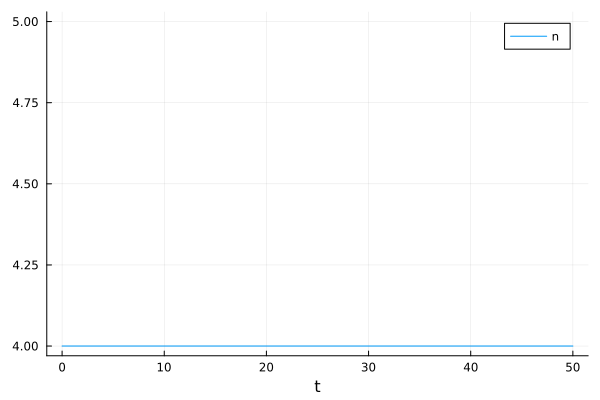

In [252]:
using Plots
n = abs2.(sol[])
plot(sol.t, n, xlabel="t", label="n")